# **INDIAN STARTUP ECOSYSTEM**

## Project Description
We embark on a journey of discovery as we leverage our data analysis expertise to uncover the untapped potential within the Indian startup ecosystem. This project is designed to not only decode the numbers but to distill insights that will guide our team towards a successful foray into this dynamic market.

## Scope of Work

- Conduct a thorough exploration of datasets, dissecting funding patterns, sectoral nuances, and geographical hotspots in the Indian startup landscap
- Analyze funding received by startups in india from 2018 to 2021



## Hypothesis 

**Null Hypothesis (H0)**: There is no significant relationship between funding and the sector  

**Alternative Hypothesis (H1)**: There is a significant relationship between funding and the sector

## Questions 
1. How does funding vary across different industry sectors in India?
2. How does funding vary with the loaction of the start-ups
3. What is the relationship between the amount of funding and the stage of the company?
4. How have funding trends evolved between 2018 and 2021?
5. What are the most attractive sectors for investors?
6. Does the location of the company influence its sector?




# **DATA EXPLORATION, DATA UNDERSTANDING and DATA ANALYSIS**

In [4]:
# Load libraries
# Database connnection
import pyodbc     
from dotenv import dotenv_values    #import the dotenv_values function from the dotenv package

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import f_oneway

# filter warnings
import warnings 
warnings.filterwarnings('ignore')

# **1. Loading and Inspection of Data**

## **1.1 Loading data from the SQL server**

In [5]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [6]:
# Create a connection string

connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
    
connection = pyodbc.connect(connection_string)



In [7]:
# sql query to get 2020 data. 
query_2020="SELECT * FROM dbo.LP1_startup_funding2020"

# sql query to get 2021 data. 
query_2021="SELECT * FROM dbo.LP1_startup_funding2021"

In [8]:
    # load 2021 data
data_2021=pd.read_sql(query_2021,connection)

    # load 2020 data
data_2020=pd.read_sql(query_2020,connection)

## **1.2 Loading CSV Files**

In [9]:
# load 2019 data
data_2019=pd.read_csv(r'C:\Users\iamde\OneDrive\Desktop\jupyter\india_startup_data\startup_funding2019.csv')

    # load 2018 data
data_2018=pd.read_csv(r'C:\Users\iamde\OneDrive\Desktop\jupyter\india_startup_data\startup_funding2018.csv')


# **2.Exploratory Data Analaysis(EDA)**

## **2.0.  2018 Dataset EDA**

In [10]:
# preview the rows and columns for the 2018 dataset
data_2018.sample(5)

,Company Name,Industry,Round/Series,Amount,Location,About Company
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...
329,arzooo.com,"Consumer Electronics, E-Commerce, E-Commerce P...",Seed,"₹15,000,000","Bangalore, Karnataka, India",E-commerce website promising the best price on...
94,Rays Power Infra,"Energy, Solar",Venture - Series Unknown,"₹2,000,000,000","Jaipur, Rajasthan, India",Rays Power Infra is a leading integrated Solar...
393,Asset Reconstruction Company (India) Ltd.,"Financial Services, Professional Services",Secondary Market,—,"Mumbai, Maharashtra, India",Asset Reconstruction Company (India) Ltd. oper...
107,Be U Salons,"Apps, Beauty, Consumer, Retail",Seed,"₹30,000,000","New Delhi, Delhi, India",Be U is India's first subscription based Salon...


In [11]:
# checking for number of columns and rows
print (data_2018.shape)
print(f"There are {data_2018.shape[0]} rows, and {data_2018.shape[1]} columns")

(526, 6)
There are 526 rows, and 6 columns


In [12]:
# checking info
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [13]:
# Describing the data
data_2018.describe()

,Company Name,Industry,Round/Series,Amount,Location,About Company
count,526,526,526,526,526,526
unique,525,405,21,198,50,524
top,TheCollegeFever,—,Seed,—,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
freq,2,30,280,148,102,2


**Findings**  
- TheCollegeFever company was the most common company  

- Seed series was the most preffered  

- most companies were based in Bangalore location  

In [14]:
# checking for duplicates
print("There are ",data_2018.duplicated().sum(),"duplicate(s)")

There are  1 duplicate(s)


In [15]:
# Checking for missing values
data_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

## **2.1. 2019 EDA**

In [16]:
# get a sample of 2019 dataset
data_2019.sample(5)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
65,Cubical Labs,2013.0,NaN,IoT,Home automation solution provider,"Dhruv Ratra, Swati Vyas",Rockstud Capital,Undisclosed,Series B
22,Springboard,2013.0,NaN,Edtech,Offers online courses and extensive mentor-bas...,"Gautam Tambay, Parul Gupta",Reach Capital,"$11,000,000",Post series A
83,Froogal,NaN,Hyderabad,Marketing & Customer loyalty,A cloud based Customer Loyalty & Engagement Pl...,"Jeevan Chowdary M, Harshit Harchani",US-based angel investors,"$1,000,000",Pre series A
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
82,Kratikal,NaN,Uttar pradesh,Technology,Provides cyber security solutions,Pavan Kushwaha,"Gilda VC, Art Venture, Rajeev Chitrabhanu","$1,000,000",Pre-series A


In [17]:
# checking for number of columns and rows
print (data_2019.shape)
print(f"There are {data_2019.shape[0]} rows, and {data_2019.shape[1]} columns")

(89, 9)
There are 89 rows, and 9 columns


In [18]:
# checking for duplicates
print("There are ",data_2019.duplicated().sum(),"duplicate(s)")

There are  0 duplicate(s)


In [19]:
# Checking for nulls
data_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [20]:
# checking for datatypes in the different columns
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [21]:
# performing descriptive analysis
data_2019.describe(include='all')

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
count,89,60.000000,70,84,89,86,89,89,43
unique,87,NaN,17,52,88,85,86,50,15
top,Kratikal,NaN,Bangalore,Edtech,Online meat shop,"Vivek Gupta, Abhay Hanjura",Undisclosed,Undisclosed,Series A
freq,2,NaN,21,7,2,2,3,12,10
mean,NaN,2014.533333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.937003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2016.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Findings**
- Kratikal company was the most common company

- Most companies had their headquarters based in Bangalore

- Majority of the companies are involved in the Edtech sector

## **2.2. 2020 EDA**

In [22]:
# get a sample of 2020 dataset
data_2020.sample(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
151,BlackSoil,2016.0,Mumbai,FinTech,Blacksoil Advisory is an independent boutique ...,Ankur Bansal,None,10000000.0,None,None
706,SirionLabs,2012.0,Gurugram,SaaS,"Provides procurement, outsourcing services & c...",Ajay Agrawal,"Tiger Global, Avatar Growth Capital",44000000.0,Series C,None
388,Brinton,2014.0,California,HealthTech,Brinton is one of the fastest growing Pharmace...,Rahul Darda,"India Alternatives Private Equity Fund, Tata C...",1300000.0,Debt,None
357,Specsmakers,2011.0,Chennai,Eyeglasses,"A leader in crafting stylish, high-quality, ey...",Pratik Shah,Eight Roads Ventures,3000000.0,None,None
133,Turtlemint,2015.0,Mumbai,HealthTech,Turtlemint has built Indian personalized insur...,"Anand Prabhudesai, Dhirendra Mahyavanshi, Kuna...","Nexus Venture Partners, Dream Incubator",30000000.0,None,None


In [23]:
#checking for number of columns and rows
print (data_2020.shape)
print(f"There are {data_2020.shape[0]} rows, and {data_2020.shape[1]} columns")

(1055, 10)
There are 1055 rows, and 10 columns


In [24]:
# checking for duplicates
print("There are ",data_2020.duplicated().sum(),"duplicate(s)")

There are  3 duplicate(s)


In [25]:
# Checking for nulls
data_2020.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [26]:
# checking for datatypes in the different columns
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [27]:
# Describe the data
data_2020.describe(include='all')

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
count,1055,842.000000,961,1042,1055,1043,1017,8.010000e+02,591,2
unique,905,NaN,77,302,990,927,848,NaN,42,2
top,Nykaa,NaN,Bangalore,Fintech,Provides online learning classes,Falguni Nayar,Venture Catalysts,NaN,Series A,Pre-Seed
freq,6,NaN,317,80,4,6,20,NaN,96,1
mean,NaN,2015.363420,NaN,NaN,NaN,NaN,NaN,1.130430e+08,NaN,NaN
std,NaN,4.097909,NaN,NaN,NaN,NaN,NaN,2.476635e+09,NaN,NaN
min,NaN,1973.000000,NaN,NaN,NaN,NaN,NaN,1.270000e+04,NaN,NaN
25%,NaN,2014.000000,NaN,NaN,NaN,NaN,NaN,1.000000e+06,NaN,NaN
50%,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,3.000000e+06,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,1.100000e+07,NaN,NaN


**Findings**  
- Nykaa company was the most common company  

- Majority of the companies had their headquarter at Bangalore  

- The average Amount invested was 113042969.54

## **2.3. 2021 EDA**

In [28]:
# get a sample of 2021 dataset
data_2021.sample(5)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
497,Mailmodo,2020.0,Bangalore,Marketing & Advertising,Mailmodo is a complete email marketing solutio...,"Aquibur Rahman, Apurv Gupta, Devyesh Tandon","Sequoia’s Surge, Y Combinator",$2000000,Seed
387,SeeVC,2020.0,New Delhi,Tech Startup,Leverages artificial intelligence (AI) to buil...,"Shivam Sood, Lark Aakarshan",Jimmy Singh,"$1,000,000",Seed
176,Wiz Freight,2020.0,Chennai,Logistics & Supply Chain,Wiz is a tech-enabled freight forwarding platf...,"Ramkumar Govindarajan, Ramkumar Ramachandran",Axilor,$3500000,Seed
524,Sea6 Energy,2010.0,Bangalore,Biotechnology,Sea6 Energy envisions a future where the abund...,"Sailaja Nori, Nelson Vadassery, Sowmya Balendi...",Aqua-Spark,$9000000,Series B
272,Fitpage,2020.0,Mumbai,"Health, Wellness & Fitness",An endurance-first fitness tech platform focus...,Vikas Singh,"Astra Ventures, Gaurav Jaitly",$300000,None


In [29]:
# get the number of rows and columns for the datasets
print(f'{data_2021.shape}')

print(f"The 2021 dataset has {data_2021.shape[0]} rows and {data_2021.shape[1]} Columns")

(1209, 9)
The 2021 dataset has 1209 rows and 9 Columns


In [30]:
# checking for duplicates
print("There are ",data_2021.duplicated().sum(),"duplicate(s)")

There are  19 duplicate(s)


In [31]:
#  Checking for nulls
data_2021.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [32]:
# checking for datatypes in the different columns
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [33]:
# Describe the dataset
data_2021.describe(include='all')

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
count,1209,1208.000000,1208,1209,1209,1205,1147,1206,781
unique,1033,NaN,70,254,1143,1095,937,278,31
top,BharatPe,NaN,Bangalore,FinTech,BharatPe develops a QR code-based payment app ...,"Ashneer Grover, Shashvat Nakrani",Inflection Point Ventures,$Undisclosed,Seed
freq,8,NaN,426,122,4,7,24,73,246
mean,NaN,2016.655629,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.517364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1963.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Findings**  
- BharatPe is the most common company  

- Most companies invested in the FinTech sector  

- Majority of the companies were found in Bangalore  


**Overall Observations:**  
**Issues with the data**

1. There is a discrepancy in the naming conventions between the columns in the 2018 and 2019 datasets compared to the 2020 and 2021 datasets.

2. The 2018 dataset exhibits some missing columns, contributing to an incomplete representation of the data.

3. Conversely, the 2020 dataset contains an additional column that appears to be extraneous and does not serve a meaningful purpose in our analysis.

**Course of Action:**

1. **Missing Column Engineering for 2018:**
   - We will address the absence of certain columns in the 2018 dataset by employing data engineering techniques to create and populate the missing columns, ensuring a comprehensive and consistent dataset.

2. **Column Name Standardization:**
   - To establish uniformity and coherence across all datasets, we will embark on a column renaming process for the 2018 and 2019 datasets. This action aims to align the naming conventions with those observed in the 2020 and 2021 datasets, facilitating seamless data integration and analysis.

3. **Extraneous Column Removal in 2020:**
   - The redundant column identified in the 2020 dataset will be removed, streamlining the dataset and eliminating unnecessary elements that do not contribute to the overall analysis objectives.

These actions collectively enhance the integrity, consistency, and completeness of the dataset, paving the way for a more robust and coherent analytical process.
ical process.







# **3. Data Cleaning and Preparation**

## **3.1. Convert Indian Rupee values in the 2018 data to dollars**


In [34]:
# Replace '₹', commas, '—', and "''" in 'Amount' column
data_2018['Amount'] = data_2018['Amount'].str.replace(',', '').str.replace('—', '').str.replace("''",'').replace('', np.nan)

# Conditionally apply multiplication only where '₹' is present
mask = data_2018['Amount'].str.contains('₹', na=False)
data_2018.loc[mask, 'Amount'] = data_2018.loc[mask, 'Amount'].str.replace('₹', '').astype(float) * 0.0146

### **Add year data was collected**

- There is need to add a column that represents the year each dataset was collected. This will help with handling the datasets after merging the dataframes 


In [35]:
# add year when data was collected column to every dataset
data_2018['year'] = pd.to_datetime('2018', format='%Y').year
data_2019['year'] = pd.to_datetime('2019', format='%Y').year
data_2020['year'] = pd.to_datetime('2020', format='%Y').year
data_2021['year'] = pd.to_datetime('2021', format='%Y').year

In [36]:
def concat_dataframes(data,data1, data2, data3):
    """
    Concatenates four dataframes along the row axis.

    Parameters:
    data (pandas.DataFrame): The first dataframe to concatenate.
    data1 (pandas.DataFrame): The second dataframe to concatenate.
    data2 (pandas.DataFrame): The third dataframe to concatenate.
    data3 (pandas.DataFrame): The fourth dataframe to concatenate.

    Returns:
    pandas.DataFrame: The concatenated dataframe.
    """
    # Rename columns to make them consistent across dataframes
    df1 = data.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What_it_does': 'about_company','Founders':'founders','Investor':'investor','Amount':'amount','Stage':'series', 'year' : 'year'})
    df2 = data1.rename(columns={'Company_Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What_it_does': 'about_company','Founders':'founders','Investor':'investor','Amount':'amount','Stage':'series','year' : 'year'})
    df3 = data2.rename(columns={'Company/Brand': 'company_brand', 'Founded': 'founded','HeadQuarter': 'headquarter','Sector': 'sector','What it does': 'about_company','Founders':'founders','Investor':'investor','Amount($)':'amount','Stage':'series','year' : 'year'})
    df4 = data3.rename(columns={'Company Name': 'company_brand','Location': 'headquarter','Industry': 'sector','About Company': 'about_company','Amount':'amount','Round/Series':'series','year' : 'year'})

    # Concatenate dataframes along the row axis
    result = pd.concat([df1, df2, df3,df4], axis=0).reset_index(drop=True)

    return result

## **Concatenate the dataframes**

In [37]:
# concating the dataframes
df= concat_dataframes(data_2021,data_2020,data_2019,data_2018)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   company_brand  2879 non-null   object 
 1   founded        2110 non-null   float64
 2   headquarter    2765 non-null   object 
 3   sector         2861 non-null   object 
 4   about_company  2879 non-null   object 
 5   founders       2334 non-null   object 
 6   investor       2253 non-null   object 
 7   amount         2474 non-null   object 
 8   series         1941 non-null   object 
 9   year           2879 non-null   int64  
 10  column10       2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 247.5+ KB


In [39]:
#Drop the extreneous column 10
df.drop('column10', axis=1, inplace= True)

## **Cleaning 'Amount' column**

**Notes**  
- Remove all currency signs  

- Remove all other umwanted characters, words and symbols  

- Fill the nulls uning interpolate method 

- Convert the column from object to float

In [40]:
df['amount']=df['amount'].replace('\$','',regex=True)
df['amount']=df['amount'].replace(['Undisclosed','undisclosed',None],np.NAN)
df['headquarter']=df['headquarter'].str.strip('\t#REF!')
df['amount']=df['amount'].replace('\,','',regex=True)
df['amount']=df['amount'].replace(",","")



In [41]:
# fix index 242
df.at[242, 'headquarter'] = None
df.at[242, 'sector'] = 'Pharmaceuticals'
df.at[242, 'founders'] = 'Varun Khanna'
df.at[242, 'investor'] = 'Morgan Stanley Private Equity Asia'
df.at[242, 'amount'] = '22000000'
df.at[242, 'series'] = 'Series C'
df.at[242, 'about_company'] = 'Development and Manufacturing'

# drop the duplicate row
df = df.drop(256, axis=0, errors='ignore')

# fix index 1148
df.at[1148, 'sector'] = 'Logistics'
df.at[1148, 'founders'] ='Basant Kumar' 
df.at[1148, 'investor'] =None
df.at[1148, 'amount'] = 1000000
df.at[1148, 'series'] = 'Seed'
 
# fix index 257
df.at[257, 'sector'] = 'Transport'
df.at[257, 'founders'] ='Anshuman Maheshwary'
df.at[257, 'investor'] =None
df.at[257, 'amount'] = 5000000
df.at[257, 'series'] = 'Seed'

# fix index 98
df.at[98, 'sector'] = 'Computer Games'
df.at[98, 'founders'] ='Pritesh Kumar'
df.at[98, 'investor'] =None
df.at[98, 'amount'] = 1200000
df.at[98, 'series'] = 'Seed'

# drop the duplicate column
df = df.drop(111, axis=0, errors='ignore')

# fix index 677
df.at[677, 'amount'] = 1000000
df.at[677, 'series'] = 'Angel'

# fix index 545
df.at[545, 'investor'] =None
df.at[545, 'amount'] = 1000000
df.at[545, 'series'] = 'Pre-series A'

# fix index 538
df.at[538, 'investor'] =None
df.at[538, 'amount'] = 300000
df.at[538, 'series'] = 'Pre-Seed'

# fix index 551
df.at[551,'amount']=300000
df.at[551,'series']=None

# fix index 674
df.at[674,'amount']=6000000
df.at[674,'series']=None

# fix index 2531
df.at[2531,'amount']=None
df.at[2531,'series']=None


In [42]:
# change the amount column to numeric
df['amount']=pd.to_numeric(df['amount'])

## **Cleaning data_year column**

**Notes**  


- Convert data type to period


In [43]:
# Convert the data_year column to date
df['year']=pd.to_datetime(df['year'], format='%Y')
# df['year']=df['year'].dt.to_period('y')
df['founded']=pd.to_datetime(df['founded']).dt.year

In [44]:
# check for nulls and duplicated
print(f"There are {df['year'].isna().sum()} Null values in the 'year' column")

There are 0 Null values in the 'year' column


In [45]:
df['year'].info()

<class 'pandas.core.series.Series'>
Index: 2877 entries, 0 to 2878
Series name: year
Non-Null Count  Dtype         
--------------  -----         
2877 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 109.5 KB


## **Cleaning 'founded' column**

**Notes**
- Handle nulls by populating with the 'bfill' method



In [46]:
print(f"There are {df['founded'].isna().sum()} Null values in the 'founded' column")

There are 769 Null values in the 'founded' column


**Notes**  
- There are 769 null values in the 'founded' column.  

- Since dropping the nulls will lead to a significant loss of our data, Backward fill will be used to fill the null values

**COURSE OF ACTION**

- We will be cleaning the missing values by fill them using interpolate method which is suitable for time series data  

- We will also be converting the data type from float to datetime for purpose of our analysis.

In [47]:
# Fill the nulls
df["founded"].interpolate(method='linear',inplace= True)

print(f"There are {df['founded'].isna().sum()} missing values")

There are 0 missing values


In [48]:
# Convert to datetime
df['founded'] = pd.to_datetime(df['founded'], format='%Y')

# Convert to period
df['founded'] = df['founded'].dt.to_period('Y')


In [49]:
df['founded'].info()

<class 'pandas.core.series.Series'>
Index: 2877 entries, 0 to 2878
Series name: founded
Non-Null Count  Dtype        
--------------  -----        
2877 non-null   period[Y-DEC]
dtypes: period[Y-DEC](1)
memory usage: 109.5 KB


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2877 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   company_brand  2877 non-null   object        
 1   founded        2877 non-null   period[Y-DEC] 
 2   headquarter    2762 non-null   object        
 3   sector         2859 non-null   object        
 4   about_company  2877 non-null   object        
 5   founders       2332 non-null   object        
 6   investor       2246 non-null   object        
 7   amount         2320 non-null   float64       
 8   series         1941 non-null   object        
 9   year           2877 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7), period[Y-DEC](1)
memory usage: 311.8+ KB


## **Cleaning the 'founders' column**

In [51]:
# Remove unwanted characters
df['founders'] = df['founders'].replace(['...', np.nan], np.NaN)

# Check the number of NaN values in the 'founders' column
nan_count = df['founders'].isna().sum()

print(nan_count)

545


In [52]:
df['founders'].info()

<class 'pandas.core.series.Series'>
Index: 2877 entries, 0 to 2878
Series name: founders
Non-Null Count  Dtype 
--------------  ----- 
2332 non-null   object
dtypes: object(1)
memory usage: 109.5+ KB


## **Cleaning **Stage** column**

Startups start with pre-seed, progress through seed, Series A, Series B, etc., securing resources for development and strategies. Additional rounds like Series C or D may follow. External funding at each stage fuels growth toward the venture's full potential.

**Pre-Seed Funding**  
Entrepreneurial idea in early development; small funds needed; limited informal channels for raising funds.

**Seed Funding**  
First official equity funding; investors provide funds for equity ownership.

**Series A Financing**  
First venture capital round; developed product, consistent revenue, long-term profit plan.

**Series B Financing**  
For established startups; substantial user base and revenue; funding for expansion.

**Series C and Beyond**  
Optional rounds for final push before IPO or unmet objectives; Series C is the third venture capital round.

**Initial Public Offering (IPO)**  
Process of offering corporate shares to the public; used for funding or divestment.

link: https://www.startupindia.gov.in/content/sih/en/funding.html

In [53]:
# fix index 551
df.at[551,'amount']=300000
df.at[551,'series']=None

# fix index 674
df.at[674,'amount']=6000000
df.at[674,'series']=None

# fix index 2531
df.at[2531,'amount']=None
df.at[2531,'series']=None

In [54]:
# Standardize funding stages in the 'stage' column
df['series'] = df['series'].replace(['Series A', 'Seies A', 'Series A-1', 'Series A2', 'Series A+', 'Series A+'], 'Series A')
df['series'] = df['series'].replace(['Pre-seed', 'Pre-seed Round', 'Pre seed Round','Non-equity Assistance', 'Pre seed round'], 'Pre-Seed Stage')
df['series'] = df['series'].replace(['Pre series A', 'Pre-series A', 'Pre Series A', 'Pre series A1', 'Pre-series A1', 'Pre- series A'], 'Pre series A')
df['series'] = df['series'].replace(['Series B', 'Series B+', 'Series B2', 'Mid series','Series B3'], 'Series B')
df['series'] = df['series'].replace(['Series C', 'Series C', 'Series C, D','Series C', 'Private Equity','PE', 'Post-IPO Equity','Series D', 'Series E', 'Series F', 'Series G', 'Series H', 'Series I','Series D1','Series F2', 'Series F1'], 'Series C and Beyond')
df['series'] = df['series'].replace(['Venture - Series Unknown', None], 'unknown')
df['series'] = df['series'].replace(['Corporate Round','Undisclosed','Secondary Market','Pre-series','Post series A','Pre-series B','Pre-Series B','Pre series B','Pre-series C','Pre series C''Grant','Debt','Debt Financing','Post-IPO Debt','Bridge','Bridge Round','Fresh funding','Funding Round','Edge'], 'Other Stages')
df['series'] = df['series'].replace(['Seed','Seed funding','Pre-Seed','Angel', 'Angel Round','Seed fund', 'Seed round', 'Seed A','Seed Funding', 'Seed Round & Series A', 'Series E2', 'Seed Round','Seed Investment','Seed+','Early seed'],'Seed Stage')

In [55]:
df['series'].unique()

array(['Pre series A', 'unknown', 'Series C and Beyond', 'Seed Stage',
       'Series B', 'Pre-Seed Stage', 'Series A', 'Other Stages',
       'Pre series C', 'Grant'], dtype=object)

In [56]:
# strip off characters 
df['series'] = df['series'].str.strip('\t#REF!')

## **Cleaning the Sector Column**

In [57]:
# Get the first sentence of every list
df['sector']=df['sector'].str.split(",").str[0]

In [58]:
# df['sector'] = df['sector'].replace({
    # 'Edtech': 'EdTech', 'Fintech': 'FinTech', 'Agriculture': 'AgriTech', 'Food & Beverages': 'Food and Beverages',
    # 'Financial Services': 'FinTech', 'Healthcare': 'HealthTech', 'HealthTech': 'HealthTech', 'Medical': 'HealthTech', 
    # 'Medtech': 'HealthTech', 'Pharmaceutical': 'HealthTech', 'Health Insurance': 'HealthTech', 
    # 'Biotechnology': 'HealthTech', 'Health Diagnostics': 'HealthTech', 'Hospital': 'HealthTech', 
    # 'Hospital & Health Care': 'HealthTech', 'Wellness': 'HealthTech', 'Dental': 'HealthTech', 
    # 'Alternative Medicine': 'HealthTech', 'Nutrition': 'HealthTech', 'Fitness': 'HealthTech', 
    # 'Mental Health': 'HealthTech', 'Healthcare/Edtech': 'HealthTech',
    # 'Life sciences': 'HealthTech', 'Biotech': 'Healthcare', 'Nutrition Tech': 'HealthTech', 
    # 'E-mobility': 'HealthTech', 'Med Tech': 'HealthTech', 'FemTech': 'HealthTech', 
    # 'Cannabis startup': 'HealthTech', 'Pharmacy': 'HealthTech', 'Medical Device': 'HealthTech', 
    # 'BioTechnology': 'HealthTech', 'Fertility tech': 'HealthTech', 'Ayurveda tech': 'HealthTech', 
    # 'E-tail': 'Healthcare', 'E store': 'E-Commerce', 'E-store': 'Healthcare', 'Telemedicine': 'HealthTech', 
    # 'HealthCare': 'HealthTech', 'AI startup': 'AI', 'Information Services': 'InfoTech & Services', 
    # 'Healthtech': 'HealthTech', 'Finance': 'FinTech', 'Health Care': 'HealthTech', 
    # 'Logistics & Supply Chain': 'Logistics', 'Food Industry': 'FoodTech', 'Foodtech': 'FoodTech', 
    # '—': 'Undisclosed', 'SaaS startup': 'SaaS', 'Health': 'HealthTech', 'Ecommerce': 'E-Commerce', 
    # 'Tech Startup': 'Tech', 'Mobility': 'Transportation', 'SaaS': 'Tech', 'Artificial Intelligence': 'AI', 
    # 'Food and Beverage': 'Food and Beverages', 'Information Technology': 'InfoTech & Services', 
    # 'Internet': 'Tech', 'Apps': 'Tech', 'Computer Software': 'Tech', 'E-commerce': 'E-Commerce', 
    # 'Agritech': 'AgriTech', 'Hospital & Health Care': 'HealthTech', 'Food': 'Foodtech', 'Cosmetics': 'Consumer Goods', 
    # 'Tech company': 'Tech', 'Automobile': 'Automotive', 'Apparel & Fashion': 'Fashion', 'Education': 'EdTech', 
    # 'Social Media': 'Media', 'Digital Media': 'Media', 'IT': 'InfoTech & Services', 'IoT': 'AI', 
    # 'Software': 'Tech', 'Industrial Automation': 'AI', 'Technology': 'Tech', 
    # 'Information Technology & Services': 'InfoTech & Services', None: 'Unknown'
# })




## **Cleaning HeadQuater Column**

In [59]:
# Get the first location from every list
df['headquarter']=df['headquarter'].str.split(",").str[0]

In [83]:
df['headquarter']=df['headquarter'].replace({'Bengaluru': 'Bangalore', 'Banglore': 'Bangalore', 'Gurugram': 'Gurgaon', 'Hyderebad': 'Hyderabad', 
                                      'New Delhi': 'Delhi', 'Ahmadabad': 'Ahmedabad', 'Ernakulam': 'Cochin', 'Telugana': 'Telangana',
                                      'Rajastan': 'Rajasthan', 'San Franciscao': 'San Francisco', 'Samsitpur': 'Samastipur', 'Santra': 'Samtra',
                                      'Rajsamand': 'Rajasthan', 'Kerala': 'Kochi','The Nilgiris': 'Nilgiris', 'Gurugram\t#REF!': 'Gurgaon', 
                                      'California': 'San Francisco', 'San Francisco Bay Area': 'San Francisco', 'Hyderebad': 'Hyderabad',
                                      'Online Media\t#REF!': 'Unknown','Pharmaceuticals\t#REF!': 'Unknown',
                                      'Information Technology & Services':'Unknown' ,'Small Towns': 'Unknown','Orissia': 'Odisha', 
                                      'Santra': 'Samtra', 'Vadodara': 'Vadodara', 'Food & Beverages': 'Unknown', 'Bangaldesh': 'Bangladesh',}) 


In [61]:
df.head()

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
0,Unbox Robotics,1970,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre series A,2021-01-01
1,upGrad,1970,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,unknown,2021-01-01
2,Lead School,1970,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series C and Beyond,2021-01-01
3,Bizongo,1970,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital",51000000.0,Series C and Beyond,2021-01-01
4,FypMoney,1970,Gurgaon,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000.0,Seed Stage,2021-01-01


In [62]:
# check for duplicates
df[df.duplicated()]


,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
107,Curefoods,1970,Bangalore,Food & Beverages,Healthy & nutritious foods and cold pressed ju...,Ankit Nagori,"Iron Pillar, Nordstar, Binny Bansal",13000000.0,unknown,2021-01-01
109,Bewakoof,1970,Mumbai,Apparel & Fashion,Bewakoof is a lifestyle fashion brand that mak...,Prabhkiran Singh,InvestCorp,8000000.0,unknown,2021-01-01
117,Advantage Club,1970,Mumbai,HRTech,Advantage Club is India's largest employee eng...,"Sourabh Deorah, Smiti Bhatt Deorah","Y Combinator, Broom Ventures, Kunal Shah",1700000.0,unknown,2021-01-01
119,Ruptok,1970,Delhi,FinTech,Ruptok fintech Pvt. Ltd. is an online gold loa...,Ankur Gupta,Eclear Leasing,1000000.0,unknown,2021-01-01
243,Trinkerr,1970,Bangalore,Capital Markets,Trinkerr is India's first social trading platf...,"Manvendra Singh, Gaurav Agarwal",Accel India,6600000.0,Series A,2021-01-01
244,Zorro,1970,Gurgaon,Social network,Pseudonymous social network platform,"Jasveer Singh, Abhishek Asthana, Deepak Kumar","Vijay Shekhar Sharma, Ritesh Agarwal, Ankiti Bose",32000000.0,Seed Stage,2021-01-01
245,Ultraviolette,1970,Bangalore,Automotive,Create and Inspire the future of sustainable u...,"Subramaniam Narayan, Niraj Rajmohan","TVS Motor, Zoho",150000000.0,Series C and Beyond,2021-01-01
246,NephroPlus,1970,Hyderabad,Hospital & Health Care,A vision and passion of redefining healthcare ...,Vikram Vuppala,IIFL Asset Management,24000000.0,Series C and Beyond,2021-01-01
247,Unremot,1970,Bangalore,Information Technology & Services,Unremot is a personal office for consultants!,Shiju Radhakrishnan,Inflection Point Ventures,700000.0,Seed Stage,2021-01-01
248,FanAnywhere,1970,Bangalore,Financial Services,Celebrity NFT platform,"Varun Chaudhary, Amit Kumar","Oasis Capital, Scorpio VC, DeltaHub Capital",NaN,Seed Stage,2021-01-01


In [63]:
# drop duplicates
df.drop_duplicates(keep='first', inplace=True)


In [64]:
# check for duplicates
print(f" There are {df.duplicated().sum()} duplicates")

 There are 0 duplicates


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2856 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   company_brand  2856 non-null   object        
 1   founded        2856 non-null   period[Y-DEC] 
 2   headquarter    2741 non-null   object        
 3   sector         2838 non-null   object        
 4   about_company  2856 non-null   object        
 5   founders       2312 non-null   object        
 6   investor       2227 non-null   object        
 7   amount         2301 non-null   float64       
 8   series         2856 non-null   object        
 9   year           2856 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7), period[Y-DEC](1)
memory usage: 245.4+ KB


# **4. Hypothesis**

**Null Hypothesis (H0)**: There is no significant relationship between funding and the sector  

**Alternative Hypothesis (H1)**: There is a significant relationship between funding and the sector

In [66]:
# Perform one-way ANOVA
result = f_oneway(*[df['amount'][df['sector'] == sector] for sector in df['sector'].unique()])

# Output the results
print(f"F-statistic: {result.statistic}")
print(f"P-value: {result.pvalue}")

# Set the significance level
alpha = 0.05

# Compare p-value with the significance level
if result.pvalue < alpha:
    print("Reject the null hypothesis. There is a significant relationship between funding amount and the sector.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between funding amount and the sector.")

F-statistic: nan
P-value: nan
Fail to reject the null hypothesis. There is no significant relationship between funding amount and the sector.


# **5. Analytical Questions**

## Questions 
1. How does funding vary across different industry sectors in India?
2. How does funding vary with the loaction of the start-ups
3. What is the relationship between the amount of funding and the stage of the company?
4. How have funding trends evolved between 2018 and 2021?
5. What are the most attractive sectors for investors?
6. Does the location of the company influence its sector?

In [67]:
df.head(3)

,company_brand,founded,headquarter,sector,about_company,founders,investor,amount,series,year
0,Unbox Robotics,1970,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",1200000.0,Pre series A,2021-01-01
1,upGrad,1970,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",120000000.0,unknown,2021-01-01
2,Lead School,1970,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",30000000.0,Series C and Beyond,2021-01-01


## **4. How have funding trends evolved between 2018 and 2021?**


### **Funding Trend by Year**

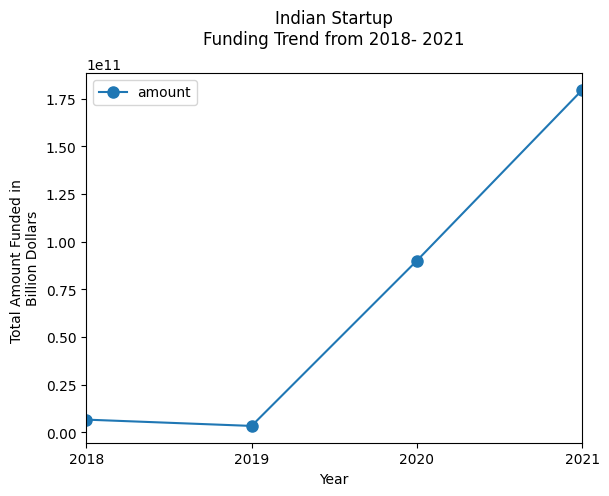

In [112]:
# Plot a line graph to display the trend over the year
funding_trend=df.groupby('year')['amount'].sum()
funding_trend=pd.DataFrame(funding_trend)
ax=funding_trend.plot.line(marker='o', markersize=8)
plt.xlabel('Year')
plt.ylabel('Total Amount Funded in \nBillion Dollars')
plt.title('Indian Startup\nFunding Trend from 2018- 2021\n')
plt.show()

#### **Observations**  
- There is slight decrease and then a sudden increase  in the Indian Startup funding from 2019 to 2021
- The steep upward trajectory suggests an increasing trend in funding

#### **Funding Trend by Top Locations**

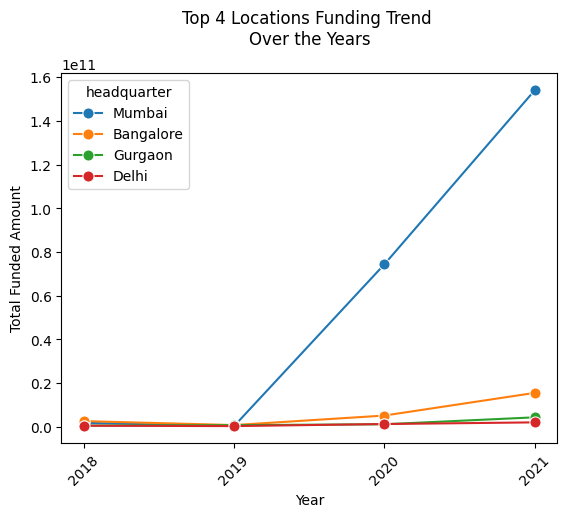

In [134]:
from matplotlib.dates import YearLocator
df['year'] = pd.to_datetime(df['year'], format='%Y')
location_trend = df.groupby(['headquarter', 'year'])['amount'].sum().sort_values(ascending=False)
top_locations = location_trend.groupby('headquarter').sum().nlargest(4).index
# Filter the original DataFrame for the top 5 locations
location_trend_top4 = location_trend[location_trend.index.get_level_values('headquarter').isin(top_locations)].reset_index()
# Set 'year' as the index for the grouped data
location_trend_top4.set_index('year', inplace=True)
# Create a line plot for each location
ax = sns.lineplot(data=location_trend_top4, x='year', y='amount', hue='headquarter', marker='o', markersize=8)
plt.xlabel('Year')
plt.ylabel('Total Funded Amount')
plt.title('Top 4 Locations Funding Trend \nOver the Years\n')
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(YearLocator())
plt.show()

#### **Observations**  
- All four locations have see a substantial increase in funding from 2019 to 2021, however, Mumbai funding grew sharply compared to the other three i.e Bangalore Delhi and Gurgaon